# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset I'll be investigating in this report is the TMDB movies dataset, the reason why I picked it is because I am interested in the properties which are related to the success of movies. through this investigation I am going to answer these questions:

>1- Do higher budget movies have higher revenues? 

>2- How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?

>3- Are movies runtime different Throughout the years or are they consistent? 



In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties
>Here I will read the data and find out what it looks like, its size, columns, values, if there are null values or duplicates and general statistics about it.

In [85]:
# Loading data and display the first 5 rows
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [86]:
# finding the size of the data
df_movies.shape

(10866, 21)

In [87]:
# finding column types and empty cells
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [88]:
# finding general statistics about the data 
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [89]:
# look for duplicated rows
df_movies.duplicated().sum()

1

### Prelimenary Observations
>From the code above it comes to my observations that the data has 10866 rows and 21 columns, there are some empty vaues in columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies. 

>As for the values from the statistical results, the popularity column's lowest value is 0.000065 and highest is 32.985763, the mean is 0.646441 and 75% of the values is 0.713817 which is way less than 32.985763 which means there's a story behind this number but it's outside of my questions scope which is why I am not going to investigate it. 
the budget column's lowest value is 0 which in my opinion these rows should be cleaned out from the data since I need this column in my investigation, the highest is around 425,000,000 and the mean is around 14,625,700 dollars. also about 75% of the budget is 15,000,000 which might be due to the zeros in the data it appears that up to 50% of it is 0 so I can't say that these statistics are accurate Representations. the revenue has the same issue as the budget column it has too many 0 values up to 50%, the highest value is 2,781,506,000 and the lowest is 0, the mean is 39,823,320 dollars. the runtime column shows that the average run time for movies is 102 minutes and the lowest is 0 minutes (no value so it should be cleaned), the highest is 900 and 75% of the movies data is 111 minutes. the data is registered for movies from 1960 until 2015 as it shows from the release_year column. I will omit the vote_count, vote_average, budget_adj and revenue_adj from my observations since I don't know the voting mechanism and the adj columns are specific to 2010 dollars which I am not interested in and all those columns are not relevant to my investigation eitherway.

>to answer my questions I only need runtime, budget, revenue, original_title and release_year columns so I will remove the other columns. As for cleaning the data, I am going to delete the duplicated row then I'm going to delete the rows whith no revenue or runtime or budget values.  

### Data Cleaning 
>In this section I'm going to remove the columns I don't need in this investigation and will delete rows with no  budget or revenue or runtime values and duplicated rows which we checked for in the previous section and there was only 1 duplicated row.

In [90]:
# removing uneeded columns
df_movies.drop(['id', 'imdb_id', 'popularity','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_movies.head()

,budget,revenue,original_title,runtime,release_year
0,150000000,1513528810,Jurassic World,124,2015
1,150000000,378436354,Mad Max: Fury Road,120,2015
2,110000000,295238201,Insurgent,119,2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,2015
4,190000000,1506249360,Furious 7,137,2015


In [91]:
#delete rows without runtime
null_runtime = df_movies.query('runtime == 0')
df_movies.drop(null_runtime.index,inplace=True)
#check if there are rows where runtime = 0
df_movies.query('runtime == 0').runtime.count()

0

In [92]:
#check if rows are dropped
df_movies.shape

(10835, 5)

In [93]:
#delete rows without budget
null_budget = df_movies.query('budget == 0')
df_movies.drop(null_budget.index,inplace=True)
#check if there are rows where budget = 0
df_movies.query('budget == 0').budget.count()

0

In [94]:
#check if rows are dropped
df_movies.shape

(5167, 5)

In [95]:
#delete rows without revenue
null_revenue = df_movies.query('revenue == 0')
df_movies.drop(null_revenue.index,inplace=True)
#check if there are rows where revenue = 0
df_movies.query('revenue == 0').revenue.count()

0

In [96]:
#check if rows are dropped
df_movies.shape

(3855, 5)

In [97]:
#delete duplicated row
df_movies.drop_duplicates(inplace=True)

In [98]:
#check if duplicates are deleted
df_movies.duplicated().sum()

0

In [99]:
#check cleaned data size
df_movies.shape

(3854, 5)

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data which is now of 3854 rows and 5 columns, at the beginning I will explore generally it by computing statistics and creating visualizations, then I will look at one variable at a time, and then follow it up by looking at relationships between variables to start answering my questions.


### General investigation and observations
> Firstly I will visualize the data in histograms .

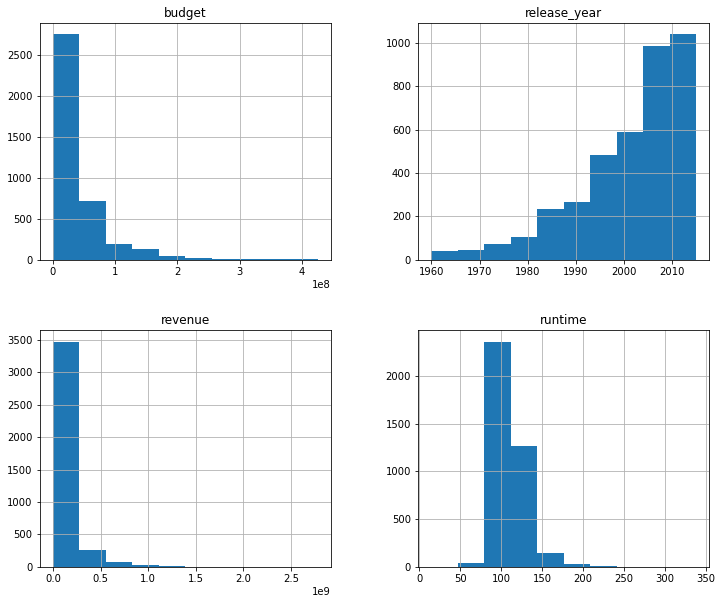

In [100]:
#plot histograms
df_movies.hist(figsize=(12,10));

>from the previous histogram of the variables budget, revenue, release_year and runtime, it is apparent that revenue, runtime and budget data are skewed to right while release_year is skewed to the left. now I will proceed to compute statistics of each variable seperated.

In [101]:
#compute general statistics for budget column
df_movies.budget.describe()

count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

> From the results shown above it appears that the movies budget mean is 37,203,700 dollars which is more than double the previous amount before cleaning the data which was 14,625,700 dollars. the lowest budget is 1 and the maximum is 425,000,000 dollars. 

In [102]:
#compute general statistics for release_year column
df_movies.release_year.describe()

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

> From the results above it appears that the movies release year mean is 2001.26 which is almost the same as before when I computed the statistics before cleaning the data which was 2001.32. the movies release year is still in the range from  1960 till 2015.

In [103]:
#compute general statistics for revenue column
df_movies.revenue.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

> From the results shown above it appears that the movies revenue mean is 107,686,600 dollars which is a lot more than before when I computed the statistics before cleaning the data which was 39,823,320 dollars, the lowest revenue is 2 and the maximum is 2,781,506,000 dollars.

In [104]:
#compute general statistics for runtime column
df_movies.runtime.describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

> From the results above it appears that the movies runtime mean is 109 minutes which is near the value before when I computed the statistics before cleaning the data which was 102 minutes. the movies runtime is in the range from 15 to 338 minutes while before cleaning the data it was in the range of 0 to 900 minutes.

### Do higher budget movies have higher revenues?
> In order to answer this question I will try to see if there is a relation between movie budget which is the independent variable and revenue which is the dependent variable, to do that I will compare the statistical values from the previous section then I will join them together in a plot

>From the previous section I found that the budget mean is 37,203,700 which is about 1 third of the revenue mean(107,686,600). while the maximum budget is 425,000,000 and the revenue's maximum value is 2,781,506,000 and I think it's clear that the latter is Significantly higher. Now to find higher budget movies I'll make a new dataframe to list the movies with higher budget than the mean budget, then plot the budget and revenue of the higher budget movies together in a scatter plot to see the correlation between them. then I will do the opposite to see if the highest revenue movies are also high budgeted movies to answer the question.

In [105]:
#find the budget mean
budget_mean = df_movies['budget'].mean()
#query movies with budget more than the mean budget
high_budget_movies = df_movies.query('budget > {}'.format(budget_mean))
high_budget_movies.describe()

,budget,revenue,runtime,release_year
count,1.287000e+03,1.287000e+03,1287.000000,1287.000000
mean,8.165310e+07,2.237801e+08,115.003885,2004.841492
std,4.641295e+07,2.489831e+08,20.903187,6.742178
min,3.766500e+07,1.440000e+02,74.000000,1978.000000
25%,5.000000e+07,6.894899e+07,100.000000,2000.000000
50%,6.600000e+07,1.492710e+08,113.000000,2005.000000
75%,1.000000e+08,2.848884e+08,127.000000,2010.000000
max,4.250000e+08,2.781506e+09,219.000000,2015.000000


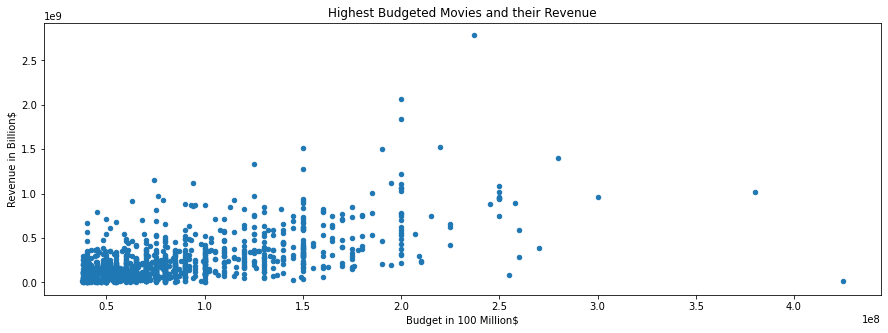

In [106]:
# Create a scatter plot for the highest budgeted movies
high_budget_movies.plot.scatter(x='budget',y='revenue',figsize=(15,5)) 
plt.title('Highest Budgeted Movies and their Revenue')
plt.xlabel('Budget in 100 Million$')
plt.ylabel('Revenue in Billion$')
plt.show() 

>from the scatter plot above there seems to be a vague relationship between budget and revenue but it is not specific. most of the budget falls between the range of 50 million to 200 millions and most of it's corresponding revenue values falls between less than 500 million up to 1 billion dollars. yet what seems interesting to me is the min and max values of the revenue in comparison to the budget. the min revenue for the highest budgeted movies is 144 dollars while the max is 2,781,506,000 dollars. next I will check the highest revenue movies and their corrisponding budget.

In [107]:
#find the revenue mean
revenue_mean = df_movies['revenue'].mean()
#query movies with revenue more than the mean revenue
high_revenue_movies = df_movies.query('revenue > {}'.format(revenue_mean))
high_revenue_movies.describe()

,budget,revenue,runtime,release_year
count,1.107000e+03,1.107000e+03,1107.000000,1107.000000
mean,7.426524e+07,2.934396e+08,115.581752,2003.282746
std,5.448290e+07,2.407357e+08,21.111119,9.471500
min,1.130000e+02,1.078795e+08,72.000000,1961.000000
25%,3.400000e+07,1.492763e+08,100.000000,1998.000000
50%,6.000000e+07,2.100000e+08,113.000000,2005.000000
75%,1.000000e+08,3.473800e+08,128.000000,2011.000000
max,3.800000e+08,2.781506e+09,201.000000,2015.000000


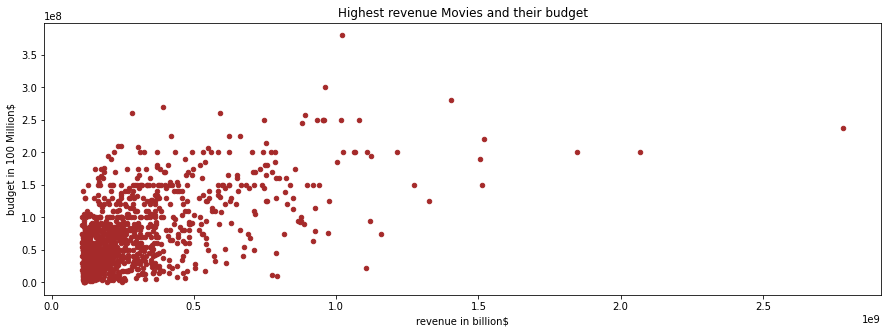

In [108]:
# Create a scatter plot for the highest revenue movies
high_revenue_movies.plot.scatter(x='revenue',y='budget',figsize=(15,5),color='brown') 
plt.title('Highest revenue Movies and their budget')
plt.xlabel('revenue in billion$')
plt.ylabel('budget in 100 Million$')
plt.show() 

>After creating a new dataframe with revenue more than the mean revenue of all the movies, I made a scatter plot to see the correlation between the highest revenue movies and their corrisponding budget. from the scatter plot above I can say that the relationship between the revenue and budget of the highest revenue movies seems less defined than the relationship between highest budgeted movies and their corrisponding budget. what's note worthy is that the min budget of the highest revenue movies is 113 dollars while the highest budget is 380,000,000 dollars. 

From the investigation to answer the question: Do higher budget movies have higher revenues? my answer is no, high budgeted movies do not necessarily have higher revenue based on the TMDB movies dataset.

### How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?

The movies release year is the independent variable and the budget is the dependent variable in this scenario. to answer the question I will group the movies by their release years then see how many movies were released per year. after that I will take the mean budget for each year to plot the relationship between movies release year and the budget.

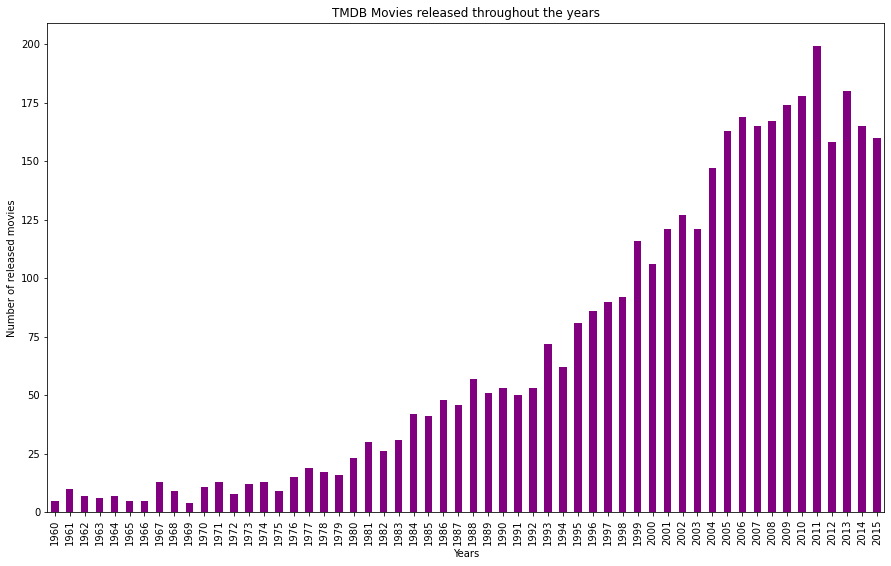

In [109]:
#find the number of released movies by their release years
movies_by_release_years = df_movies.groupby('release_year').size()
#distribute the movies list by their release year in a bar chart
movies_by_release_years.plot.bar(x='release_year',y='budget',figsize=(15,9), color='purple');
plt.title('TMDB Movies released throughout the years')
plt.xlabel('Years')
plt.ylabel('Number of released movies')
plt.show() 

>From the bar chart above which is skewed to the left, I can say that clearly in general there are more movies relesed as years go by, for example there were no more than 25 movies released per year during the 60s and 70s, yet during the 80s there are 25 movies or more. there are over 50 movies per year released in the 90s and over 100 movies released per year in the 2000s, over 150 movies released per year in the 2010s.

In [110]:
#find the mean budget per year of movies grouped by their release year
mean_budget_by_years = df_movies.groupby('release_year').budget.mean()
mean_budget_by_years.head()

release_year
1960    4.161390e+06
1961    3.863700e+06
1962    5.635714e+06
1963    1.018583e+07
1964    4.847880e+06
Name: budget, dtype: float64

In [111]:
#find general statistics about the budget
mean_budget_by_years.describe()

count    5.600000e+01
mean     2.328698e+07
std      1.661075e+07
min      2.958032e+06
25%      7.861538e+06
50%      1.509790e+07
75%      4.245631e+07
max      4.802285e+07
Name: budget, dtype: float64

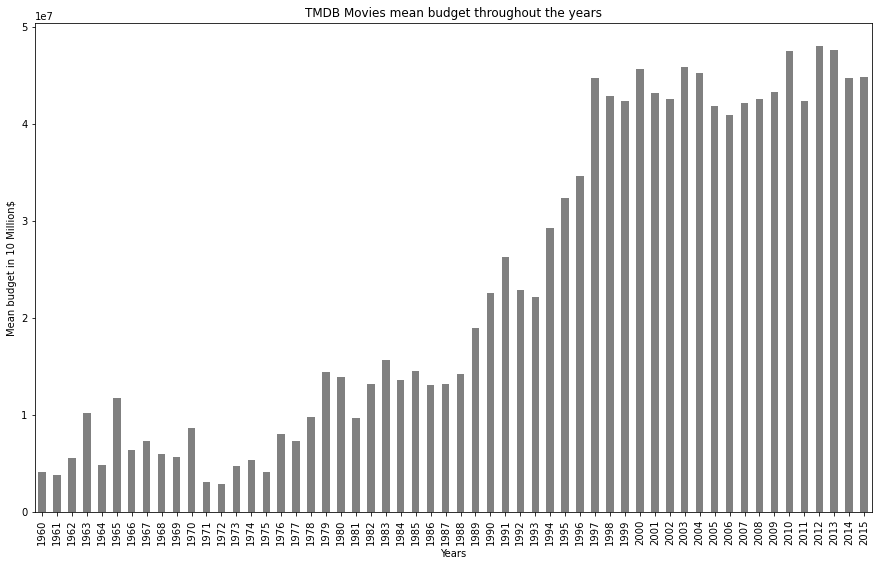

In [112]:
#plot the relationship between movies organized by their release year and their mean budget
mean_budget_by_years.plot.bar(x=0,y=1,figsize=(15,9), color='grey');
plt.title('TMDB Movies mean budget throughout the years')
plt.xlabel('Years')
plt.ylabel('Mean budget in 10 Million$')
plt.show() 

> From the graph above which is skewed to the left I think it's clear that the mean budget of the movies is increasing in general as the years go by. the mean budget seems to be at it's lowest in 1972 and 1971, actually the 60s and 70s budget mean seems fluctuating through the years which I think needs furthur investigation to see if there are different variables that affected the inconsistency of the mean budget of movies from the 60s and 70s or simply there aren't enough records to get an accurate budget mean for those years. 

As for my answer for the question: How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget? I'd say yes there is a relationship between the movies budget and release year. the budget mean seems to have a trend of increasing throughout the years, yet there seems to be fluctuations during the early years that might be due to having less records of movies in those years, generally there are less than 50 movies released per year in all of 60s, 70s and 80s. while in the 90s there are more than 50 and 2000 and 2010s have more than 100 movies released by the year. there might be more movies released in the early years but are not in this database. but for this database I can say the trend over the later decades is that the budget have increased for the movies as years go by.    

### Are movies runtime different throughout the years or are they consistent? 

Just like the budget over the years, to answer this question I will have the release year as the independent variable and the runtime as the dependent variable. I will make a dataframe of the movies grouped by their release year, then I will find the runtime mean of each year. afterwards I will join the movies release year and runtime in a plot.

In [113]:
#find the mean runtime for movies by their years
mean_runtime_by_years = df_movies.groupby('release_year').runtime.mean()
mean_runtime_by_years.head()

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
Name: runtime, dtype: float64

In [114]:
#find general statistics
mean_runtime_by_years.describe()

count     56.000000
mean     114.847356
std       12.203451
min      103.304348
25%      107.932782
50%      109.718896
75%      118.346154
max      167.600000
Name: runtime, dtype: float64

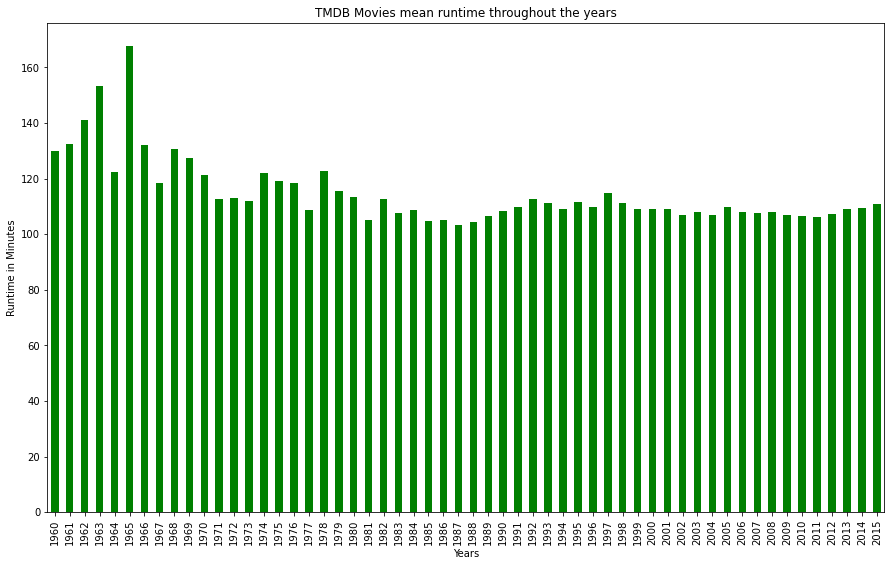

In [115]:
#plot the relationship between movies organized by their release year and their runtime
mean_runtime_by_years.plot.bar(x=0,y=1,figsize=(15,9), color='green');
plt.title('TMDB Movies mean runtime throughout the years')
plt.xlabel('Years')
plt.ylabel('Runtime in Minutes')
plt.show()

>From the statistics listed above the min of the mean runtime is about 103 minutes, and the max of the mean runtime is about 167 minutes. from the gragh above it seems that generally the movies in the 60s and 70s have longer runtime than later decades, and movies from the 80s forward seems to have a more uniform runtime mean from 100 to 120 minutes.

As for my answer for the question: Are movies runtime different throughout the years or are they consistent? there seems to be inconsistency in movie runtime during the 60s, then it became more uniform during the 70s but longer than the runtime of the 80s and later. so yes I'd say movies runtime is different throghout the years but they got to be more uniform consistently in later years. 

<a id='conclusions'></a>
## Conclusions

> From this investigation I can say that high budgeted movies do not necessarily have higher revenue based on the TMDB movies dataset, and the relationship between the revenue and budget of the highest revenue movies seems even less relevant than the relationship between highest budgeted movies and their corrisponding budget. the budget mean seems to have a trend of increasing throughout the years, yet there seems to be fluctuations during the 60s and 70s, otherwise it is consistently increasing throughout the years. On the other hand, movies runtime back in the 60s and 70s had longer runtime than the 80s and forward. the movies mean runtime has become almost consistent at roughly 115 minutes from the 90s till 2015. these findings might be true on the TMDB movies dataset but could not be applicable for other movies dataset.
